# Vergleich der Heuristiken in Mutation und Rekombination

In [2]:
# imports
# add folder to syspath to import GeneticAlgorithm 
import os
import sys
path = os.path.dirname(os.path.dirname(os.path.abspath('')))
sys.path.insert(0, path+'/GeneticAlgorithm')
from GeneticAlgorithm import GeneticAlgorithm
import numpy as np
from matplotlib import pyplot as plt

In [3]:
# lade die Probleme
# small problem
small_objects  = np.load(os.path.join(path,'Compare/Ressources/betterproblem/small_objects.npy'))
small_container = np.load(os.path.join(path,'Compare/Ressources/betterproblem/small_container.npy'))
small_optimal_solution = np.load(os.path.join(path, 'Compare/Ressources/betterproblem/small_optimal.npy'))
# medium Problem
medium_objects= np.load(os.path.join(path,'Compare/Ressources/betterproblem/medium_objects.npy'))
medium_container = np.load(os.path.join(path,'Compare/Ressources/betterproblem/medium_container.npy'))
medium_optimal_solution = np.load(os.path.join(path, 'Compare/Ressources/betterproblem/medium_optimal.npy'))
# large Problem
large_objects  = np.load(os.path.join(path,'Compare/Ressources/betterproblem/large_objects.npy'))
large_container = np.load(os.path.join(path,'Compare/Ressources/betterproblem/large_container.npy'))
large_optimal_solution = np.load(os.path.join(path, 'Compare/Ressources/betterproblem/large_optimal.npy'))

In [11]:
def plot_heuristic(objects, container_vol, container_weight, xlim, ylim):
    av_number = 10
    number_generations = 30
    amount_obj = len(objects)
    average_vals_random = np.zeros((av_number, number_generations))
    average_vals_first_no_sort = np.zeros((av_number, number_generations))
    average_vals_first_combined = np.zeros((av_number, number_generations))
    average_vals_first_chance = np.zeros((av_number, number_generations))
    #average_vals_first_combined_onesort = np.zeros((av_number, number_generations))
    best_vals_random = np.zeros((av_number, number_generations))
    best_vals_first_no_sort = np.zeros((av_number, number_generations))
    best_vals_first_combined = np.zeros((av_number, number_generations))
    best_vals_first_chance = np.zeros((av_number, number_generations))

    #best_vals_first_combined_onesort = np.zeros((av_number, number_generations))

    for index in np.arange(av_number):
        GA = GeneticAlgorithm(objects, container_vol, container_weight, 30, fit_heuristic='random')
        _,_,_, average_vals_random[index], best_vals_random[index],_,_,_ = GA.run()
        GA = GeneticAlgorithm(objects, container_vol, container_weight, 30, fit_heuristic='first_fit', fit_sort = 'no_sort')
        _,_,_, average_vals_first_no_sort[index], best_vals_first_no_sort[index],_,_,_ = GA.run()
        GA = GeneticAlgorithm(objects, container_vol, container_weight, 30,fit_heuristic='first_fit', fit_sort = 'combined')
        _,_,_, average_vals_first_combined[index], best_vals_first_combined[index],_,_,_ = GA.run()
        GA = GeneticAlgorithm(objects, container_vol, container_weight, 30, fit_heuristic='first_fit', fit_sort = 'chance')
        _,_,_, average_vals_first_chance[index], best_vals_first_chance[index],_,_,_ = GA.run()
        #GA = GeneticAlgorithm(objects, container_vol, container_weight, 30, fit_heuristic='first_fit', fit_sort = 'combined', sort_in_recom_and_mutation=False)
    #_,_, average_vals_first_combined_onesort[index], best_vals_first_combined_onesort[index],_,_,_ = GA.run()


    # calc average
    average_vals_random = np.average(average_vals_random, 0)
    average_vals_first_no_sort = np.average(average_vals_first_no_sort, 0)
    average_vals_first_combined = np.average(average_vals_first_combined, 0)
    #average_vals_first_combined_onesort = np.average(average_vals_first_combined_onesort, 0)
    average_vals_first_chance = np.average(average_vals_first_chance, 0)
    best_vals_random = np.average(best_vals_random, 0)
    best_vals_first_no_sort = np.average(best_vals_first_no_sort, 0)
    best_vals_first_combined = np.average(best_vals_first_combined, 0)
    best_vals_first_chance = np.average(best_vals_first_chance, 0)
    #best_vals_first_combined_onesort = np.average(best_vals_first_combined_onesort, 0)


    # Plot
    x_vals = np.arange(number_generations)
    # Punkte visualisieren
    fig, ax = plt.subplots(2,figsize=(16,10))
    fig.tight_layout(h_pad=6)
    ax[0].set_title(f'Durchschnittliche Anzahl der Container für ein Problem mit {amount_obj} Objekten')
    ax[0].plot(x_vals, average_vals_random, color="blue", label = 'Random Fit')
    ax[0].plot(x_vals, average_vals_first_no_sort, color="green", label = 'First Fit (no sort)')
    ax[0].plot(x_vals, average_vals_first_chance, color="red", label = 'First Fit (chance)')
    ax[0].plot(x_vals, average_vals_first_combined, color="orange", label = 'First Fit (combined)')
    ax[0].set_xlim(xlim)
    ax[0].set_ylim(ylim)
    ax[0].set_xlabel('Generation/Iteration')
    ax[1].set_xlabel('Generation/Iteration')
    ax[0].set_ylabel("Anzahl Container")
    ax[1].set_ylabel("Anzahl Container")
    #ax[0].plot(x_vals, average_vals_first_combined_onesort, color="purple", label = 'First Fit (combined)(onesort)')
    ax[0].legend()
    ax[1].set_title(f'Beste Anzahl der Container für ein Problem mit {amount_obj} Objekte')
    ax[1].plot(x_vals, best_vals_random, color="blue", label = 'Random Fit')
    ax[1].plot(x_vals, best_vals_first_no_sort, color="green", label = 'First Fit (no sort)')
    ax[1].plot(x_vals, best_vals_first_chance, color="red", label = 'First Fit (chance)')
    ax[1].plot(x_vals, best_vals_first_combined, color="orange", label = 'First Fit (combined)')
    ax[1].set_xlim(xlim)
    ax[1].set_ylim(ylim)
    #ax[1].plot(x_vals, best_vals_first_combined_onesort, color="purple", label = 'First Fit (combined)(onesort)')
    ax[1].legend()
    plt.show()

# Small Problem

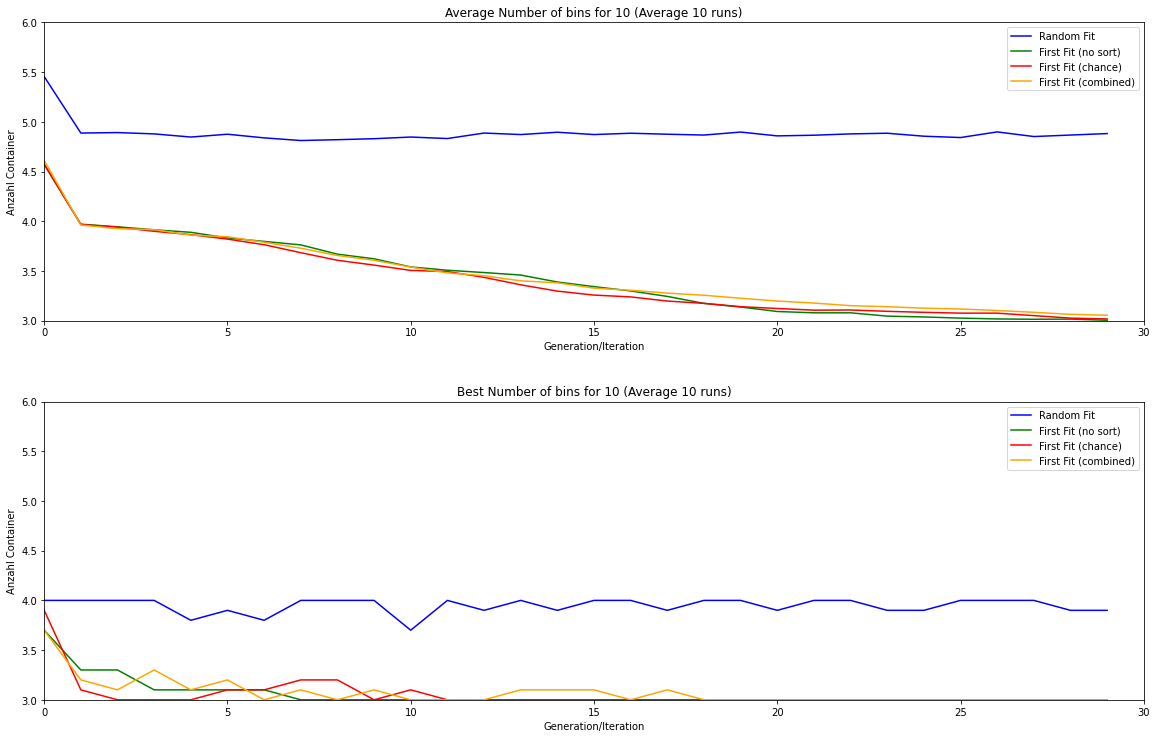

In [4]:
plot_heuristic(small_objects, small_container[0], small_container[1], [0,30],[3,6])

# Medium Problem

In [5]:
plot_heuristic(medium_objects, medium_container[0], medium_container[1], [0,30],[10,150])

KeyboardInterrupt: 

# Large Problem

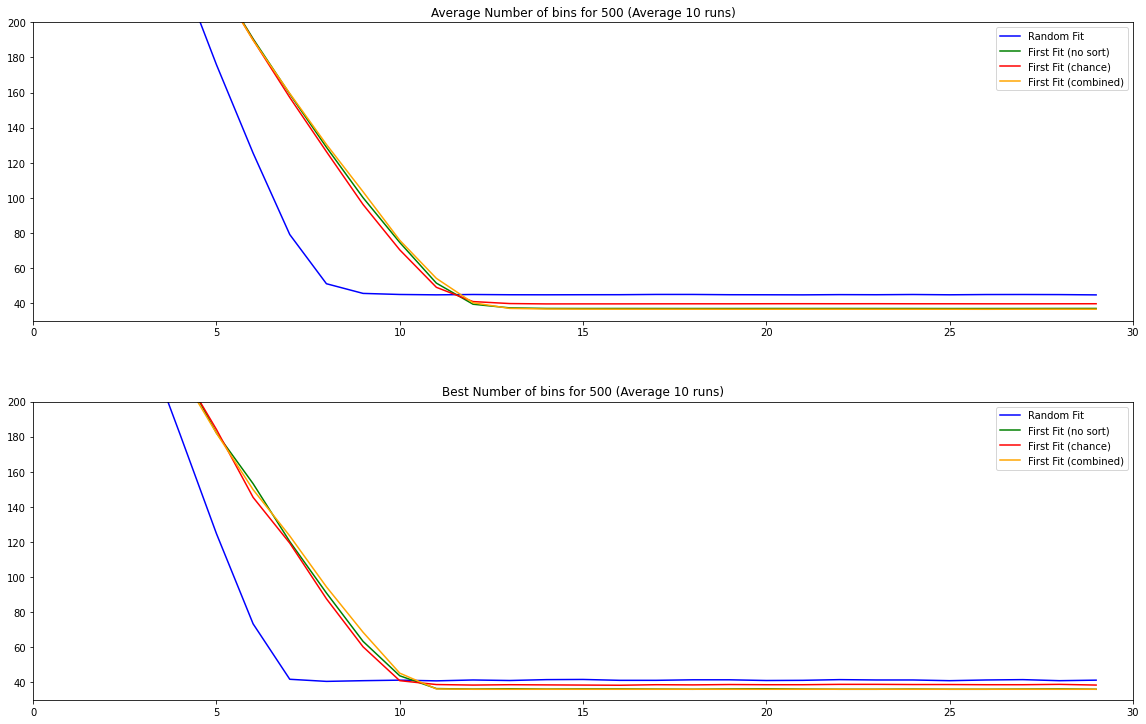

In [6]:
plot_heuristic(large_objects, large_container[0], large_container[1], [0,30],[30,200])

# New Problems

In [9]:
# lade die Probleme (neu)
# 50
new_50_0 = np.load(os.path.join(path,'Compare/Ressources/newproblem/o50_0.npy'))
new_50_1 = np.load(os.path.join(path,'Compare/Ressources/newproblem/o50_1.npy'))
new_50_2 = np.load(os.path.join(path,'Compare/Ressources/newproblem/o50_2.npy'))
new_50_3 = np.load(os.path.join(path,'Compare/Ressources/newproblem/o50_3.npy'))
new_50_4 = np.load(os.path.join(path,'Compare/Ressources/newproblem/o50_4.npy'))
new_50_5 = np.load(os.path.join(path,'Compare/Ressources/newproblem/o50_5.npy'))
new_50_6 = np.load(os.path.join(path,'Compare/Ressources/newproblem/o50_6.npy'))
new_50_7 = np.load(os.path.join(path,'Compare/Ressources/newproblem/o50_7.npy'))
new_50_8 = np.load(os.path.join(path,'Compare/Ressources/newproblem/o50_8.npy'))
new_50_9 = np.load(os.path.join(path,'Compare/Ressources/newproblem/o50_9.npy'))
new_50_container = np.load(os.path.join(path,'Compare/Ressources/newproblem/medium_container.npy'))
new_50_optimal = np.load(os.path.join(path,'Compare/Ressources/newproblem/optimal_solutions_50.npy'))
# 100
new_100_0 = np.load(os.path.join(path,'Compare/Ressources/newproblem/o100_0.npy'))
new_100_1 = np.load(os.path.join(path,'Compare/Ressources/newproblem/o100_1.npy'))
new_100_2 = np.load(os.path.join(path,'Compare/Ressources/newproblem/o100_2.npy'))
new_100_3 = np.load(os.path.join(path,'Compare/Ressources/newproblem/o100_3.npy'))
new_100_4 = np.load(os.path.join(path,'Compare/Ressources/newproblem/o100_4.npy'))
new_100_5 = np.load(os.path.join(path,'Compare/Ressources/newproblem/o100_5.npy'))
new_100_6 = np.load(os.path.join(path,'Compare/Ressources/newproblem/o100_6.npy'))
new_100_7 = np.load(os.path.join(path,'Compare/Ressources/newproblem/o100_7.npy'))
new_100_8 = np.load(os.path.join(path,'Compare/Ressources/newproblem/o100_8.npy'))
new_100_9 = np.load(os.path.join(path,'Compare/Ressources/newproblem/o100_9.npy'))
new_100_container = np.load(os.path.join(path,'Compare/Ressources/newproblem/medium_container.npy'))
new_100_optimal = np.load(os.path.join(path,'Compare/Ressources/newproblem/optimal_solutions_100.npy'))
# 250
new_250_0 = np.load(os.path.join(path,'Compare/Ressources/newproblem/o250_0.npy'))
new_250_1 = np.load(os.path.join(path,'Compare/Ressources/newproblem/o250_1.npy'))
new_250_2 = np.load(os.path.join(path,'Compare/Ressources/newproblem/o250_2.npy'))
new_250_3 = np.load(os.path.join(path,'Compare/Ressources/newproblem/o250_3.npy'))
new_250_4 = np.load(os.path.join(path,'Compare/Ressources/newproblem/o250_4.npy'))
new_250_5 = np.load(os.path.join(path,'Compare/Ressources/newproblem/o250_5.npy'))
new_250_6 = np.load(os.path.join(path,'Compare/Ressources/newproblem/o250_6.npy'))
new_250_7 = np.load(os.path.join(path,'Compare/Ressources/newproblem/o250_7.npy'))
new_250_8 = np.load(os.path.join(path,'Compare/Ressources/newproblem/o250_8.npy'))
new_250_9 = np.load(os.path.join(path,'Compare/Ressources/newproblem/o250_9.npy'))
new_250_container = np.load(os.path.join(path,'Compare/Ressources/newproblem/medium_container.npy'))
new_250_optimal = np.load(os.path.join(path,'Compare/Ressources/newproblem/optimal_solutions_250.npy'))
# 500
new_500_0 = np.load(os.path.join(path,'Compare/Ressources/newproblem/o500_0.npy'))
new_500_1 = np.load(os.path.join(path,'Compare/Ressources/newproblem/o500_1.npy'))
new_500_2 = np.load(os.path.join(path,'Compare/Ressources/newproblem/o500_2.npy'))
new_500_3 = np.load(os.path.join(path,'Compare/Ressources/newproblem/o500_3.npy'))
new_500_4 = np.load(os.path.join(path,'Compare/Ressources/newproblem/o500_4.npy'))
new_500_5 = np.load(os.path.join(path,'Compare/Ressources/newproblem/o500_5.npy'))
new_500_6 = np.load(os.path.join(path,'Compare/Ressources/newproblem/o500_6.npy'))
new_500_7 = np.load(os.path.join(path,'Compare/Ressources/newproblem/o500_7.npy'))
new_500_8 = np.load(os.path.join(path,'Compare/Ressources/newproblem/o500_8.npy'))
new_500_9 = np.load(os.path.join(path,'Compare/Ressources/newproblem/o500_9.npy'))
new_500_container = np.load(os.path.join(path,'Compare/Ressources/newproblem/medium_container.npy'))
new_500_optimal = np.load(os.path.join(path,'Compare/Ressources/newproblem/optimal_solutions_500.npy'))
# 1000
new_1000_0 = np.load(os.path.join(path,'Compare/Ressources/newproblem/o1000_0.npy'))
new_1000_1 = np.load(os.path.join(path,'Compare/Ressources/newproblem/o1000_1.npy'))
new_1000_2 = np.load(os.path.join(path,'Compare/Ressources/newproblem/o1000_2.npy'))
new_1000_3 = np.load(os.path.join(path,'Compare/Ressources/newproblem/o1000_3.npy'))
new_1000_4 = np.load(os.path.join(path,'Compare/Ressources/newproblem/o1000_4.npy'))
new_1000_5 = np.load(os.path.join(path,'Compare/Ressources/newproblem/o1000_5.npy'))
new_1000_6 = np.load(os.path.join(path,'Compare/Ressources/newproblem/o1000_6.npy'))
new_1000_7 = np.load(os.path.join(path,'Compare/Ressources/newproblem/o1000_7.npy'))
new_1000_8 = np.load(os.path.join(path,'Compare/Ressources/newproblem/o1000_8.npy'))
new_1000_9 = np.load(os.path.join(path,'Compare/Ressources/newproblem/o1000_9.npy'))
new_1000_container = np.load(os.path.join(path,'Compare/Ressources/newproblem/medium_container.npy'))
new_1000_optimal = np.load(os.path.join(path,'Compare/Ressources/newproblem/optimal_solutions_1000.npy'))

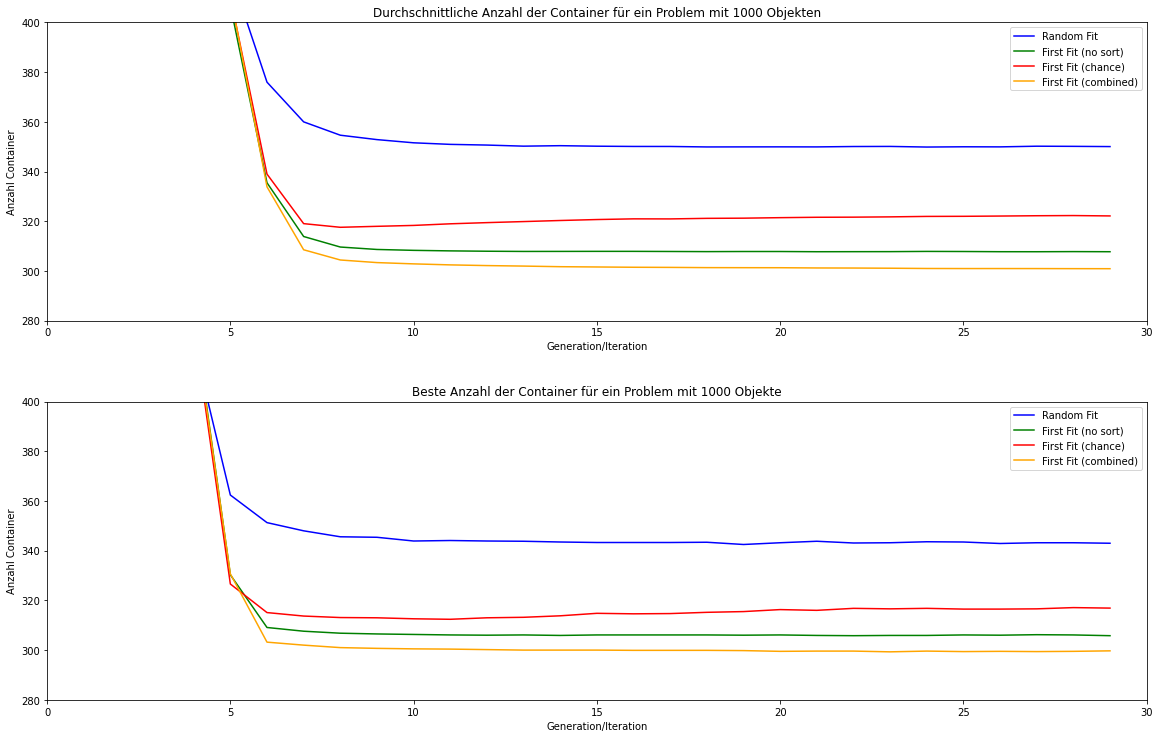

In [12]:
plot_heuristic(new_1000_5, new_1000_container[0], new_1000_container[1], [0,30],[280,400])

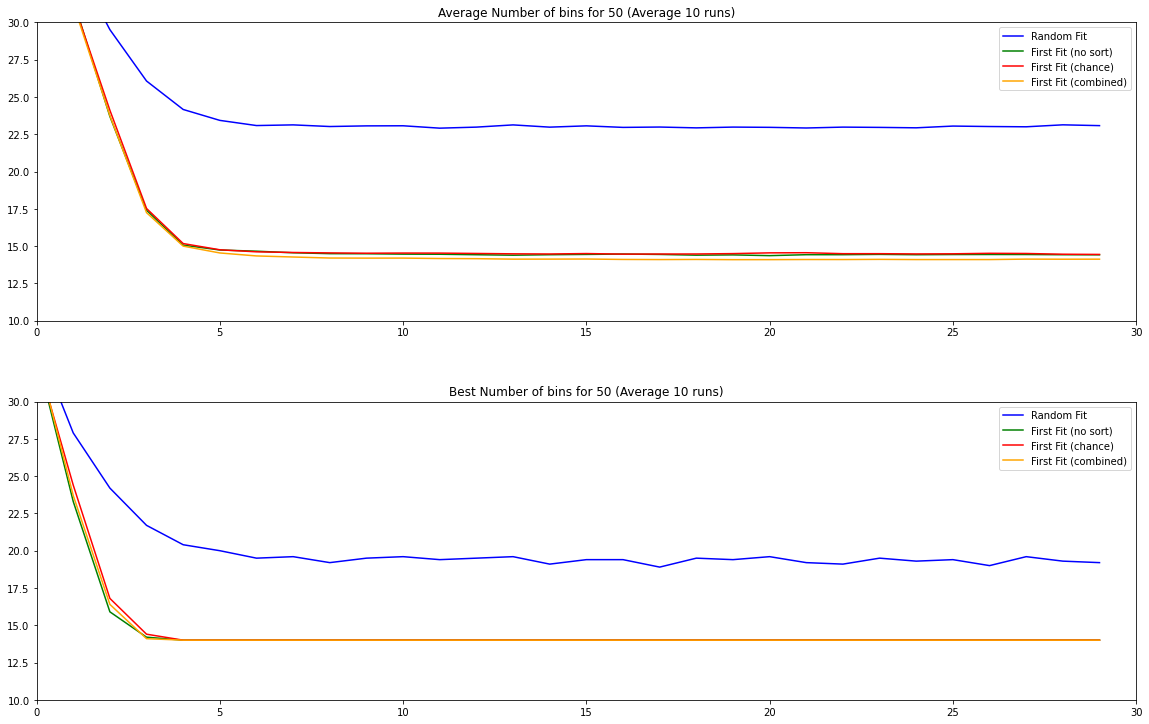

In [9]:
plot_heuristic(new_50_5, new_50_container[0], new_50_container[1], [0,30],[10,30])

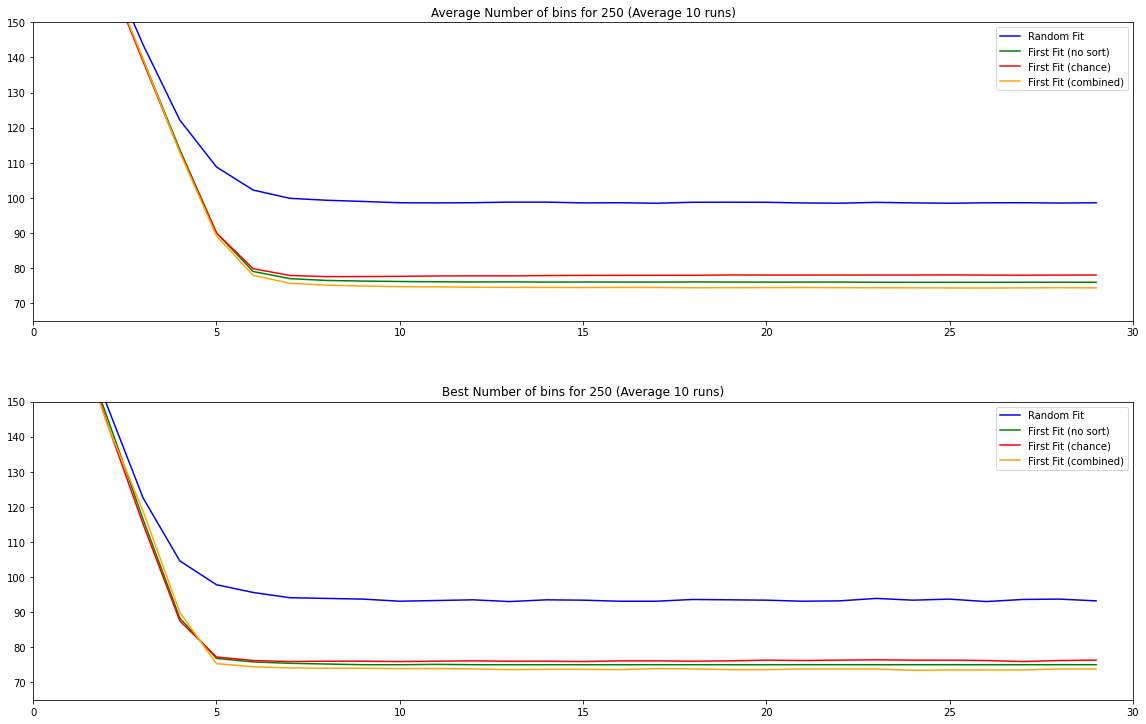

In [10]:
plot_heuristic(new_250_5, new_250_container[0], new_250_container[1], [0,30],[65,150])

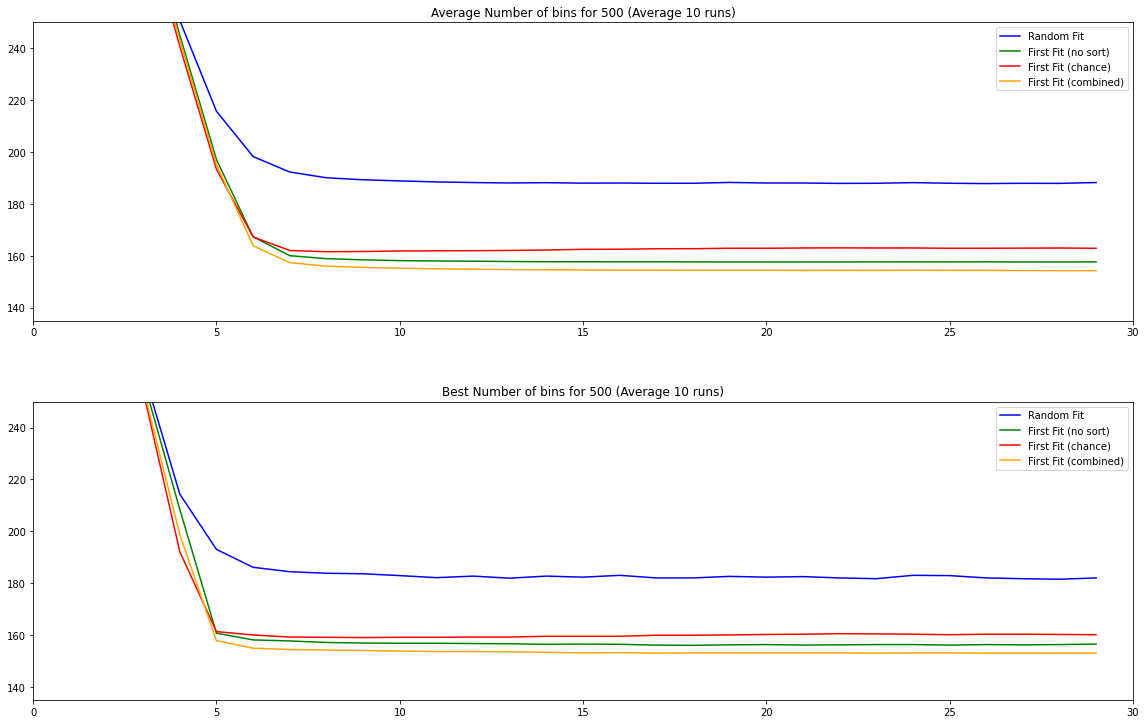

In [11]:
plot_heuristic(new_500_5, new_500_container[0], new_500_container[1], [0,30],[135,250])

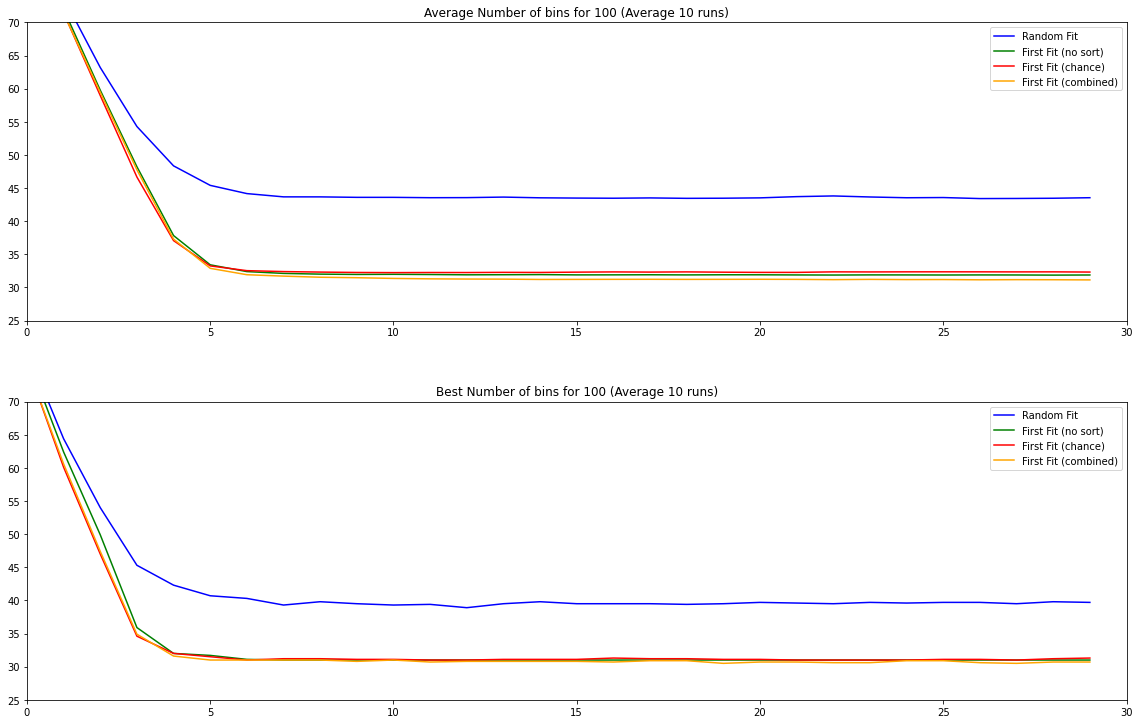

In [12]:
plot_heuristic(new_100_5, new_100_container[0], new_100_container[1], [0,30],[25,70])